In [1]:
import os
import getpass
from langchain_core.messages import HumanMessage,SystemMessage

In [2]:
os.environ["ANTHROPIC_API_KEY"] = getpass.getpass("Enter your Anthropic API key: ")

In [3]:
os.environ["TAVILY_API_KEY"] = getpass.getpass("TAVILY_API_KEY")

In [4]:
os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API key: ")

In [5]:
os.environ["USDA_API_KEY"] = getpass.getpass("Enter your USDA API key: ")

In [6]:
# from utils.graph import graph
from utils.graph import build_graph

/Users/Work/Desktop/ai_bootcamp/code/Cert_Challenge/AIE7_Certification_Challenge/src/utils/graph.py:24: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily_tool = TavilySearchResults(max_results=5)


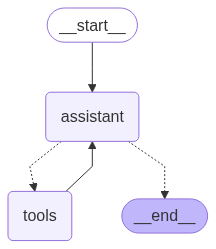

In [7]:
# graph = build_graph(model_name="gpt-4.1-nano",display_graph=True)
graph = build_graph(model_name = "gpt-4.1",display_graph=True)

In [8]:
# https://world.openfoodfacts.org/product/0074806103173/fruit-flavored-drink

In [9]:
# Example usage function
# def validate_upc_with_description(upc: str, description: str, model_name: str = 'claude-sonnet-4-20250514'):
#     """
#     Convenience function to validate a UPC with description.
    
#     Args:
#         upc (str): The UPC code to validate
#         description (str): Product description
#         model_name (str): Model to use for the agent
        
#     Returns:
#         The agent's response
#     """
#     graph = build_graph(model_name)
    
#     # Format the input as specified
#     input_text = f"{{upc:{upc},description:{description}}}"
    
#     from langchain_core.messages import HumanMessage
#     messages = [HumanMessage(content=input_text)]
    
#     # Run the graph
#     result = graph.invoke({"messages": messages})
    
#     return result["messages"][-1].content

In [10]:
# Format the input as specified
input_text = "{upc:028400433303,description:hot chips}"

messages = [HumanMessage(content=input_text)]

# Run the graph
result = graph.invoke({"messages": messages})

print(result["messages"][-1].content)

Extraction Confidence: ✅ High (Structured input provided)
- Extracted UPC: 028400433303
- Extracted Description: "hot chips"

Validation Process:
- UPC "028400433303" is valid (check digit passed).

Product Lookup Results:

OpenFoodFacts:
- Product Name: Cheetos Crunchy XXTRA Flamin' Hot
- Brand: Cheetos
- Categories: Not specified
- OpenFoodFacts page: https://world.openfoodfacts.org/product/028400433303

USDA Food Data Central:
- Description: CHEESE FLAVORED SNACKS, XXTRA FLAMIN' HOT
- Brand Owner: Frito-Lay Company
- Brand Name: CHEETOS
- Main Ingredients: Enriched corn meal, vegetable oil, XXTRA Flamin' Hot seasoning, cheddar cheese, and more.
- Nutrition (per 100g): 571 kcal, 35.7g fat, 57.1g carbs, 7.14g protein, 821mg sodium

Web Search:
- Multiple sources confirm product as "Cheetos Crunchy XXTRA Flamin' Hot" (UPCitemdb, Target, Walmart, Cheetos official website).
- Product is consistently described as an extra spicy, crunchy cheese-flavored snack.

Description Comparison:
🔍 Us

In [11]:
#######STATE IS NOT MAINTAINED!!!!#######
# IN:
# messages = [HumanMessage(content="what are the ingredients?")]

# # Run the graph
# result = graph.invoke({"messages": messages})

# print(result["messages"][-1].content)

#OUT:
# I didn’t find a product or UPC code in your message. To help you with ingredients, 
# please provide a product name or a UPC/barcode number. For example, you can say 
# “What are the ingredients for UPC 028400433303?” or “Tell me the ingredients in Lay’s Classic Potato Chips.”


In [12]:
# Format the input as specified
input_text = "{upc:7480610317,description:juice}"

messages = [HumanMessage(content=input_text)]

# Run the graph
result = graph.invoke({"messages": messages})

print(result["messages"][-1].content)

Extraction confidence: ✅ High (structured input)
- Original UPC provided: 7480610317 (10 digits)
- Corrected to UPC-A: 074806103173 (check digit added: 3)

User description: "juice"

Product Lookup Results:
- OpenFoodFacts: "Fruit flavored drink", Brand: LITTLE HUG, Ingredients: Water, high fructose corn syrup, citric acid, natural and artificial flavors, sodium citrate, acesulfame potassium, sucralose, vitamin E acetate, niacin, pantothenic acid, vitamin B6, vitamin B12, biotin.
- USDA FDC: "FRUIT FLAVORED DRINK, BLUE RASPBERRY", Brand: LITTLE HUG, Owner: Harvest Hill Beverage Company, Same ingredient list as above.

Description comparison:
🔍 User description "juice" partially matches - found related terms in [category: beverages, product: fruit flavored drink]. This product is technically a "fruit flavored drink" (not 100% juice), commonly marketed for kids.

Additional web info:
- These drinks are known as "Little Hug Fruit Barrels," available in flavors like Blue Raspberry, Fruit P

In [13]:
# Format the input as specified
messages = [HumanMessage(content="I have information about a product with the upc code 028400596008 and the description hot fries. What is this?")]

# Run the graph
result = graph.invoke({"messages": messages})

print(result["messages"][-1].content)

DEBUG - Model response content: {"upc": "028400596008", "description": "hot fries", "confidence": "High", "found_upc": true}
Extraction confidence: High  
Extracted UPC: 028400596008  
Extracted description: "hot fries"

Validation:
- UPC 028400596008 is valid.

Database Results:
- OpenFoodFacts: Product is "Fries Corn & Potato Snacks, Flamin' Hot" by Chester's.  
- USDA Food Data Central: Product is "CORN & POTATO SNACKS, FLAMIN' HOT" by CHESTER'S (Frito-Lay).

Description Comparison:
✅ User description 'hot fries' matches the product data (commonly known as Chester's Flamin' Hot Fries).

Supplementary Web Information:
- Multiple retail and product sites (including Frito-Lay and upcitemdb) confirm this is Chester's Flamin' Hot Fries, a spicy corn and potato snack shaped like fries.

Summary:
- Product: Chester's Flamin' Hot Fries (UPC 028400596008)
- Brand: Chester's (Frito-Lay)
- Description: Spicy, crunchy corn and potato snacks shaped like fries ("Hot Fries")
- Ingredients include:

In [8]:
inputs = {"messages" : [HumanMessage(content="I have information about a product with the upc code 028400596008 and the description hot fries. What is this?")]}

async for chunk in graph.astream(inputs, stream_mode="updates"):
    for node, values in chunk.items():
        print(f"Receiving update from node: '{node}'")
        print(values["messages"])
        print("\n\n")

Receiving update from node: 'assistant'
[AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_EgEDg1AjYUayHxTvp6AMn7m5', 'function': {'arguments': '{"input_text":"I have information about a product with the upc code 028400596008 and the description hot fries. What is this?"}', 'name': 'upc_extraction'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 1475, 'total_tokens': 1517, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_6608a0a96a', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--40312136-8b7d-4201-a717-43736a4a5320-0', tool_calls=[{'name': 'upc_extraction', 'args': {'input_text': 'I have information about a product with the upc code 028400596008 and the description hot 

In [16]:
inputs = {"messages" : [HumanMessage(content="I have information about a product with the upc code 8400596007 and the description hot fries. What is this?")]}

async for chunk in graph.astream(inputs, stream_mode="updates"):
    for node, values in chunk.items():
        print(f"Receiving update from node: '{node}'")
        print(values["messages"])
        print("\n\n")

Receiving update from node: 'assistant'
[AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_sCmCmabcv0SVHeM2CZwMpJJm', 'function': {'arguments': '{"input_text":"I have information about a product with the upc code 8400596007 and the description hot fries. What is this?"}', 'name': 'upc_extraction'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 1476, 'total_tokens': 1518, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 1408}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_6608a0a96a', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--f9b24888-d988-47be-a4f8-d5c38a5e59e5-0', tool_calls=[{'name': 'upc_extraction', 'args': {'input_text': 'I have information about a product with the upc code 8400596007 and the description hot f

In [17]:
print(result["messages"][-1].content)

Extraction confidence: High  
Extracted UPC: 028400596008  
Extracted description: "hot fries"

Validation:
- UPC 028400596008 is valid.

Database Results:
- OpenFoodFacts: Product is "Fries Corn & Potato Snacks, Flamin' Hot" by Chester's.  
- USDA Food Data Central: Product is "CORN & POTATO SNACKS, FLAMIN' HOT" by CHESTER'S (Frito-Lay).

Description Comparison:
✅ User description 'hot fries' matches the product data (commonly known as Chester's Flamin' Hot Fries).

Supplementary Web Information:
- Multiple retail and product sites (including Frito-Lay and upcitemdb) confirm this is Chester's Flamin' Hot Fries, a spicy corn and potato snack shaped like fries.

Summary:
- Product: Chester's Flamin' Hot Fries (UPC 028400596008)
- Brand: Chester's (Frito-Lay)
- Description: Spicy, crunchy corn and potato snacks shaped like fries ("Hot Fries")
- Ingredients include: Enriched corn meal, vegetable oil, dried potatoes, cheddar cheese, spices, artificial color, and more.

For more details:
- 

In [ ]:
prompt = """
  Waht product is upc 074806103173 and return the ingredients.
"""

In [9]:

messages = [HumanMessage(content=prompt)]
result = graph.invoke({"messages": messages})["messages"][-1].content

In [10]:
result

'The product associated with UPC 074806103173 is not explicitly listed in the search results. However, based on the search data from various barcode lookup tools and databases, I can suggest that this UPC code can be used to identify specific product details. Would you like me to help you find more detailed information about this UPC or guide you on how to look it up?'